In [1]:
import subprocess
import shlex
import numpy as np
import pandas as pd
import time
import os

In [2]:
fname = '../data/twitter.csv'  # File to read in days for which we get completeness

In [28]:
days = []
values = []
with open(fname, 'r') as f:
    while True:
        line = f.readline()
        if line == '':
            break
        days += [int(line.split(',')[0])]
        values += [int(line.split(',')[1].rstrip('/n'))]

In [4]:
def doy2date(doy):
    year = doy // 1000
    days = doy % 1000
    dates = np.array([np.datetime64(year[i].astype('string')) + np.timedelta64(days[i]-1, 'D') \
                     for i in range(year.shape[0])])
    return pd.DatetimeIndex(dates)

In [5]:
days_date = doy2date(np.array(days))

Iterate of list items do sequential hadoop fs commands

In [6]:
completeness = np.zeros(len(days_date))

In [7]:
start = time.time()
for i in range(len(days_date)):
    print('{:.1f}s : {:} / {:}'.format(time.time()-start, i+1, len(days_date)))
    date_tmp = days_date[i]
    month = str(date_tmp.month)
    if len(month) < 2:
        month = '0' + month
    
    day = str(date_tmp.day)
    if len(day) < 2:
        day = '0' + day
    
    lengths = 0
    
    for j in range(24):
        hour = str(j)
        if len(hour) < 2:
            hour = '0' + hour
        cmd = 'hadoop fs -du -h /user/imoise/TwitterData/{:}_{:}/{:}/{:}/'.format(date_tmp.year,
                                                                                  month,
                                                                                  day,
                                                                                  hour)
        cmd_split = shlex.split(cmd)
        p = subprocess.Popen(cmd_split, stdout=subprocess.PIPE)
        outp = p.communicate()[0]
        
        clean_list = [f for f in outp.split() if len(f) > 5 and f[-5:] == '.json']
        
        lengths += len(clean_list)
    
    completeness[i] = float(lengths) / (24*60)
    
    if i % 20 == 0 and i > 0:
        print(completeness[:i])

0.0s : 1 / 179
59.2s : 2 / 179
116.6s : 3 / 179
174.0s : 4 / 179
231.3s : 5 / 179
288.3s : 6 / 179
345.0s : 7 / 179
402.2s : 8 / 179
459.3s : 9 / 179
516.5s : 10 / 179
573.8s : 11 / 179
631.4s : 12 / 179
688.6s : 13 / 179
745.7s : 14 / 179
802.9s : 15 / 179
860.1s : 16 / 179
917.5s : 17 / 179
974.9s : 18 / 179
1032.0s : 19 / 179
1089.5s : 20 / 179
1146.0s : 21 / 179
[ 0.99791667  0.99861111  0.99791667  1.          0.88888889  0.58125     1.
  1.          0.98125     0.99583333  0.98541667  0.99722222  0.99305556
  0.96666667  0.99513889  1.          1.00069444  0.96944444  1.
  0.58333333]
1203.2s : 22 / 179
1260.4s : 23 / 179
1317.6s : 24 / 179
1374.9s : 25 / 179
1432.1s : 26 / 179
1489.3s : 27 / 179
1546.5s : 28 / 179
1603.8s : 29 / 179
1661.0s : 30 / 179
1718.1s : 31 / 179
1775.4s : 32 / 179
1832.6s : 33 / 179
1889.9s : 34 / 179
1947.1s : 35 / 179
2004.3s : 36 / 179
2061.8s : 37 / 179
2119.0s : 38 / 179
2176.4s : 39 / 179
2233.6s : 40 / 179
2290.8s : 41 / 179
[ 0.99791667  0.998611

In [8]:
print(completeness)

[ 0.99791667  0.99861111  0.99791667  1.          0.88888889  0.58125     1.
  1.          0.98125     0.99583333  0.98541667  0.99722222  0.99305556
  0.96666667  0.99513889  1.          1.00069444  0.96944444  1.
  0.58333333  0.99791667  1.          1.          1.          0.99861111
  1.          1.          0.99930556  1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  0.99861111  1.          1.          0.          1.          1.          1.
  1.          1.          0.99930556  1.          1.          1.          1.
  0.21875     0.60972222  1.          1.          1.          1.          1.
  0.93194444  1.          1.          1.          0.99930556  1.          1.
  1.          1.          0.93263889  0.          1.          1.          1.
  1.          1.          1.          0.99791667  0.99791667  0.99930556
  1.          1.       

In [9]:
os.system('touch ../data/completeness.csv')

for i in range(len(days)):
    os.system('echo "{:},{:.6f}" >> ../data/completeness.csv'.format(days[i], completeness[i]))

In [10]:
cat ../data/completeness.csv

2014121,0.997917
2014122,0.998611
2014123,0.997917
2014124,1.000000
2014125,0.888889
2014126,0.581250
2014127,1.000000
2014128,1.000000
2014129,0.981250
2014130,0.995833
2014131,0.985417
2014132,0.997222
2014133,0.993056
2014134,0.966667
2014135,0.995139
2014136,1.000000
2014137,1.000694
2014138,0.969444
2014139,1.000000
2014140,0.583333
2014141,0.997917
2014142,1.000000
2014143,1.000000
2014144,1.000000
2014145,0.998611
2014146,1.000000
2014147,1.000000
2014148,0.999306
2014149,1.000000
2014150,1.000000
2014151,1.000000
2014152,1.000000
2014152,1.000000
2014153,1.000000
2014154,1.000000
2014155,1.000000
2014156,1.000000
2014157,1.000000
2014158,1.000000
2014159,1.000000
2014160,1.000000
2014161,1.000000
2014162,1.000000
2014163,1.000000
2014164,1.000000
2014165,1.000000
2014166,0.998611
2014167,1.000000
2014168,1.000000
2014169,0.000000
2014182,1.000000
2014183,1.000000
2014184,1.000000
2014185,1.000000
2014186,1.000000
2014187,0.999306
2014188,1.000000
2014189,1.000000
2014190,1.0000

In [14]:
doy2date(np.array([2014169]))

DatetimeIndex(['2014-06-18'], dtype='datetime64[ns]', freq=None, tz=None)

In [17]:
!hadoop fs -du -h /user/imoise/TwitterData/2014_06/

Picked up _JAVA_OPTIONS: -Xmx1024m -Xms256m -XX:ParallelGCThreads=1
16/05/05 09:37:50 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
14.1 G  /user/imoise/TwitterData/2014_06/01
14.1 G  /user/imoise/TwitterData/2014_06/02
13.8 G  /user/imoise/TwitterData/2014_06/03
14.2 G  /user/imoise/TwitterData/2014_06/04
14.1 G  /user/imoise/TwitterData/2014_06/05
13.5 G  /user/imoise/TwitterData/2014_06/06
13.6 G  /user/imoise/TwitterData/2014_06/07
14.4 G  /user/imoise/TwitterData/2014_06/08
14.3 G  /user/imoise/TwitterData/2014_06/09
14.2 G  /user/imoise/TwitterData/2014_06/10
14.3 G  /user/imoise/TwitterData/2014_06/11
15.1 G  /user/imoise/TwitterData/2014_06/12
14.5 G  /user/imoise/TwitterData/2014_06/13
14.4 G  /user/imoise/TwitterData/2014_06/14
14.9 G  /user/imoise/TwitterData/2014_06/15
14.6 G  /user/imoise/TwitterData/2014_06/16
14.2 G  /user/imoise/TwitterData/2014_06/17


In [18]:
cat ../data/twitter_06.csv

2014152,9927
2014153,15124
2014154,14991
2014155,16265
2014156,15866
2014157,16191
2014158,16629
2014159,15563
2014160,17862
2014161,17156
2014162,18282
2014163,18706
2014164,16701
2014165,19193
2014166,18398
2014167,20702
2014168,23218
2014169,6576


In [23]:
!hadoop fs -du -h /user/schmiflo/Models

Picked up _JAVA_OPTIONS: -Xmx1024m -Xms256m -XX:ParallelGCThreads=1
16/05/05 09:41:30 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
914.1 G  /user/schmiflo/Models/Cooccs
8.1 M    /user/schmiflo/Models/Dictionaries


In [27]:
!hadoop fs -du -h /user/imoise/TwitterData/2014_05

Picked up _JAVA_OPTIONS: -Xmx1024m -Xms256m -XX:ParallelGCThreads=1
16/05/05 09:42:47 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
13.7 G  /user/imoise/TwitterData/2014_05/01
13.3 G  /user/imoise/TwitterData/2014_05/02
13.5 G  /user/imoise/TwitterData/2014_05/03
14.3 G  /user/imoise/TwitterData/2014_05/04
12.9 G  /user/imoise/TwitterData/2014_05/05
8.2 G   /user/imoise/TwitterData/2014_05/06
13.9 G  /user/imoise/TwitterData/2014_05/07
14.0 G  /user/imoise/TwitterData/2014_05/08
13.0 G  /user/imoise/TwitterData/2014_05/09
13.9 G  /user/imoise/TwitterData/2014_05/10
14.1 G  /user/imoise/TwitterData/2014_05/11
13.9 G  /user/imoise/TwitterData/2014_05/12
13.3 G  /user/imoise/TwitterData/2014_05/13
13.2 G  /user/imoise/TwitterData/2014_05/14
13.9 G  /user/imoise/TwitterData/2014_05/15
13.5 G  /user/imoise/TwitterData/2014_05/16
14.0 G  /user/imoise/TwitterData/2014_05/17
13.9 G  /user/imoise/TwitterData/201

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

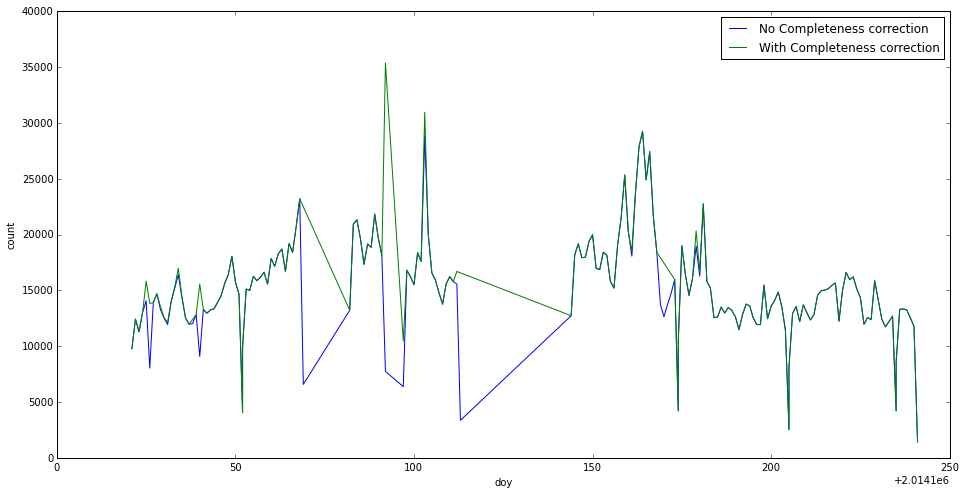

In [40]:
plt.figure(figsize=(16, 8))
plt.plot(days, values, label='No Completeness correction')
mask = completeness > 0
plt.plot(np.array(days)[mask], np.array(values)[mask] / completeness[mask], label='With Completeness correction')
plt.xlabel('doy')
plt.ylabel('count')
plt.legend()

In [55]:
!hadoop fs -du -h /user/

Picked up _JAVA_OPTIONS: -Xmx1024m -Xms256m -XX:ParallelGCThreads=1
16/05/05 09:58:11 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
10.8 G   /user/YOUR USERNAME
4.8 G    /user/amarfurt
10.8 G   /user/anino
10.8 G   /user/anttil
0        /user/anweigel
26.9 G   /user/arau
0        /user/balistef
0        /user/brinn
10.8 G   /user/bruclaud
2.8 G    /user/cakoch
366.5 G  /user/cschulz
4.0 G    /user/cuklinaj
10.8 G   /user/dalco
90       /user/data
10.8 G   /user/dozerov
18.2 G   /user/dreed
10.8 G   /user/dsiegism
4.0 G    /user/dspies
10.8 G   /user/enkelejda
10.8 G   /user/epournar
120.4 M  /user/eric
10.8 G   /user/fschmich
10.8 G   /user/gadavid
10.8 G   /user/guot
4.0 G    /user/hansr
213.0 G  /user/heinzec
10.7 G   /user/hilsenbo
9.1 G    /user/hluetcke
5.6 T    /user/imoise
10.8 G   /user/iusov
317.0 M  /user/jaggim
4.0 G    /user/josee
15.6 G   /user/kohleman
8.8 G    /user/loblum
10.8 G   /user/